<a href="https://colab.research.google.com/github/killian31/Paint_recognition/blob/main/Paintings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painter Recognition Project

Copyright : Killian Steunou

Linkedin : https://www.linkedin.com/in/killian-steunou/

Github : https://github.com/killian31

In this notebook we will train a model able to recognize the painter of a painting, just for Dali, Monnet and Van Gogh for now.

In order to load the data like I did using Google Drive, you need to download the datasets here : https://github.com/killian31/Paint_recognition/raw/main/datasets.zip , unzip the file and import the folder in your Google Drive.

# 1. Import the data

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [36]:
#Import dataset
import pathlib
import os

data_dir = pathlib.Path('/content/drive/MyDrive/Colab_Notebooks/Paintings')

# To use the folder in your Google Drive, replace this with '/content/drive/MyDrive/name_of_your_folder'

print(data_dir)
print(os.path.abspath(data_dir))

/content/drive/MyDrive/Colab_Notebooks/Paintings
/content/drive/MyDrive/Colab_Notebooks/Paintings


In [37]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

514


In [38]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 514 files belonging to 3 classes.
Using 412 files for training.
Found 514 files belonging to 3 classes.
Using 102 files for validation.
['Dali', 'Monnet', 'Van_Gogh']


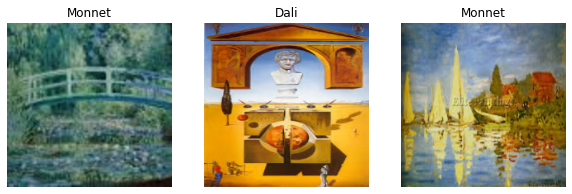

In [39]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# 2. Design the model

We use callbacks to stop the training when an accuracy of 90% has been reached.

In [40]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

In [41]:
callbacks = myCallback()

The training sould take 15 minutes with 30 epochs, 30 minutes with 60 epochs.

In [42]:
from tensorflow.keras import layers

num_classes = 3

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

model.fit( 
  train_data,
  validation_data=val_data,
  epochs=60,
  callbacks=[callbacks]
)

Epoch 1/60


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


138/138 [==============================] - 131s 940ms/step - loss: 1.1169 - accuracy: 0.3592 - val_loss: 1.0956 - val_accuracy: 0.4020
Epoch 2/60
138/138 [==============================] - 126s 916ms/step - loss: 1.0958 - accuracy: 0.3592 - val_loss: 1.1030 - val_accuracy: 0.3333
Epoch 3/60
138/138 [==============================] - 127s 919ms/step - loss: 1.1158 - accuracy: 0.4296 - val_loss: 1.0858 - val_accuracy: 0.4216
Epoch 4/60
138/138 [==============================] - 127s 917ms/step - loss: 1.0762 - accuracy: 0.4393 - val_loss: 1.0423 - val_accuracy: 0.5490
Epoch 5/60
138/138 [==============================] - 127s 923ms/step - loss: 1.0297 - accuracy: 0.5000 - val_loss: 1.0209 - val_accuracy: 0.4804
Epoch 6/60
138/138 [==============================] - 127s 923ms/step - loss: 0.9383 - accuracy: 0.5485 - val_loss: 0.9347 - val_accuracy: 0.5490
Epoch 7/60
138/138 [==============================] - 128s 925ms/step - loss: 0.8583 - accuracy: 0.5995 - val_loss: 0.9174 - val_accura

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 197, 197, 128)     6272      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 95, 95, 64)        131136    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 44, 44, 32)        32800     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 22, 22, 32)       

# 3. Testing the model

Saving Van-Gogh001.jpeg to Van-Gogh001.jpeg


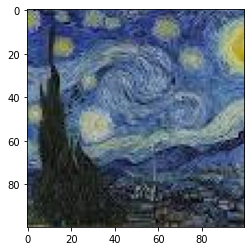

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I think this is Van Gogh with a precision of 73.66%


In [44]:
import cv2
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0) 
    res = model.predict_classes(img_to_predict)
    #print(res)
    #print(model.predict(img_to_predict))
    if res == 0:
        print(f"I think this is Dali with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")
    elif res == 1 :
        print(f"I think this is Monnet with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")
    elif res == 2 :
        print(f"I think this is Van Gogh with a precision of {round(float(model.predict(img_to_predict)[0,res]*100), 2)}%")

saving the model : 

In [45]:
model.save('drive/MyDrive/Models/painter_model')

INFO:tensorflow:Assets written to: drive/MyDrive/Models/painter_model/assets


# 4. What the CNN sees

Shape of the image (3538,)


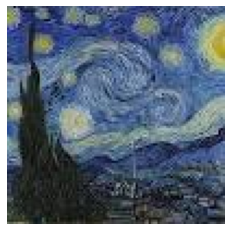

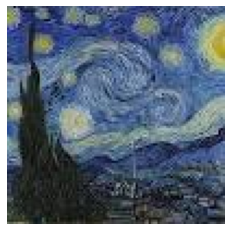

-----------------------------------------------------
1st convolutionnal layer
conv2d_4 | Features Shape: (1, 197, 197, 128)
Dimension 128
--------
1nd Pooling
max_pooling2d_4 | Features Shape: (1, 98, 98, 128)
Dimension 128
-----------------------------------------------------
-----------------------------------------------------
2st convolutionnal layer
conv2d_5 | Features Shape: (1, 95, 95, 64)
Dimension 64
--------
2nd Pooling
max_pooling2d_5 | Features Shape: (1, 47, 47, 64)
Dimension 64
-----------------------------------------------------
-----------------------------------------------------
3st convolutionnal layer
conv2d_6 | Features Shape: (1, 44, 44, 32)
Dimension 32
--------
3nd Pooling
max_pooling2d_6 | Features Shape: (1, 22, 22, 32)
Dimension 32
-----------------------------------------------------
-----------------------------------------------------
4st convolutionnal layer
conv2d_7 | Features Shape: (1, 19, 19, 16)
Dimension 16
--------
4nd Pooling
max_pooling2d_7 | F

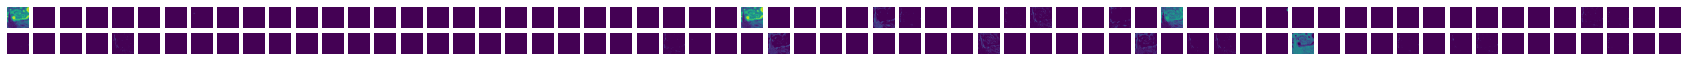

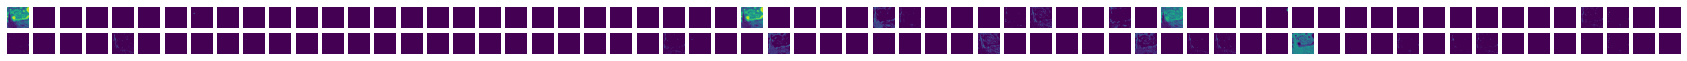

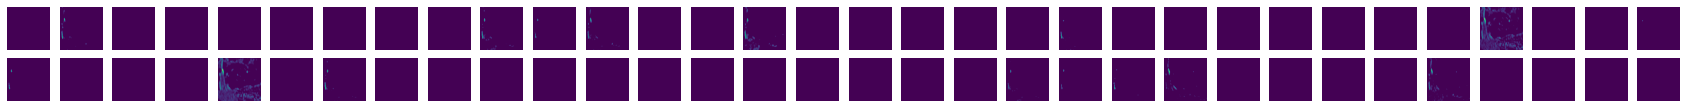

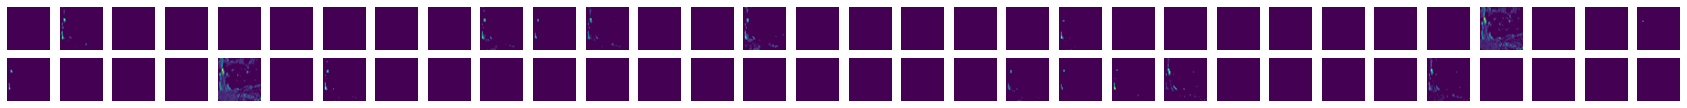

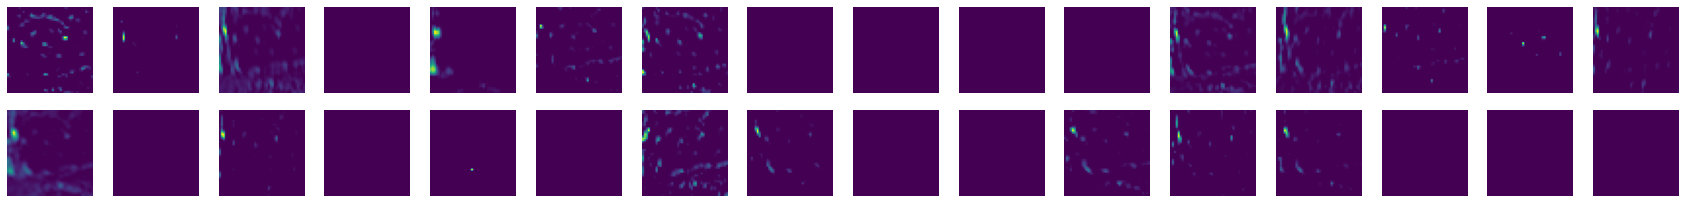

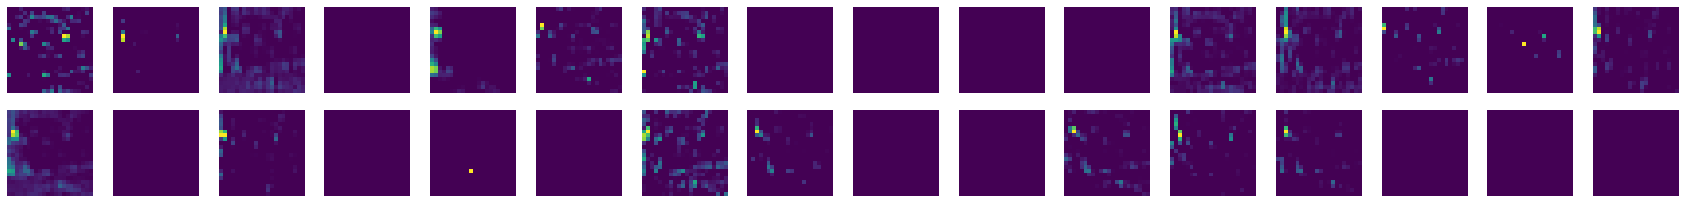

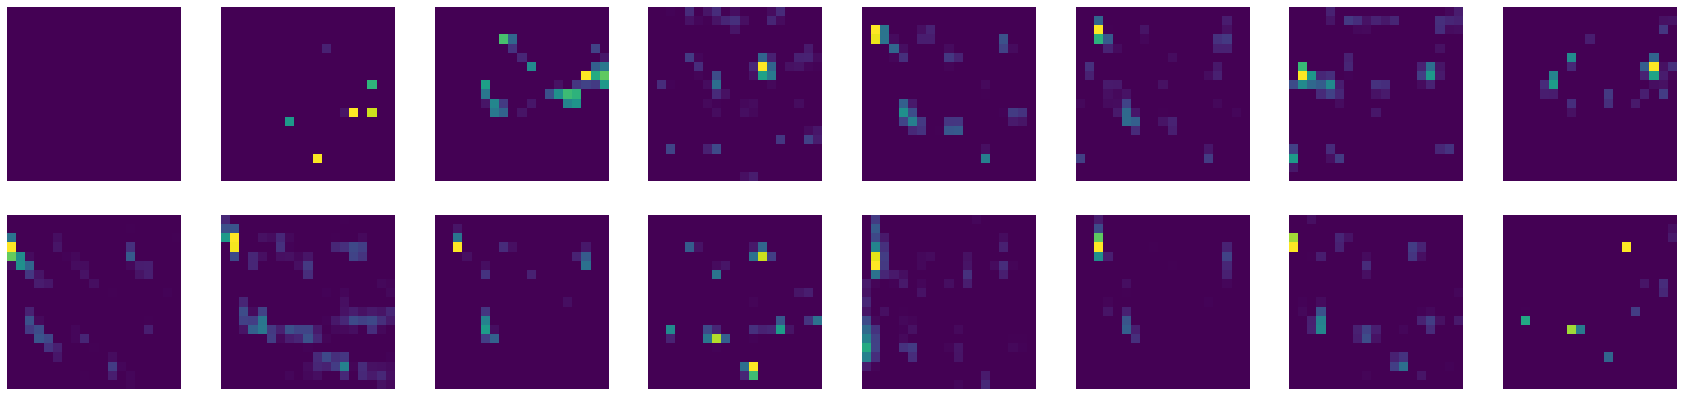

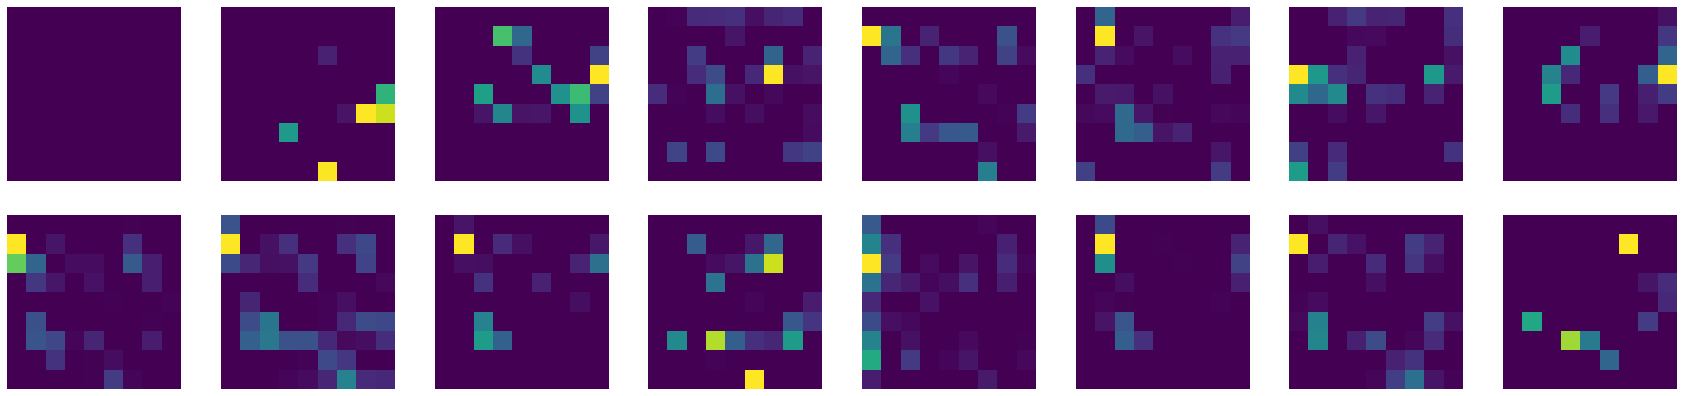

In [48]:
#display filters for Van Gogh

import requests
import cv2
from tensorflow.keras.models import Model

def display_image_filtered(name_image,model,layer_name,image):
    inp= model.inputs 
    out1= model.get_layer(layer_name).output  
    feature_map_1= Model(inputs= inp, outputs= out1)  
    img=cv2.resize(image,(200,200))              
    input_img= np.expand_dims(img, axis=0)      
    f=feature_map_1.predict(input_img) 
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')
    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')        
    for i in range(dim):
        ax = fig.add_subplot(dim/2,dim/2,i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])



url_van_gogh = r'https://github.com/killian31/Paint_recognition/blob/fddf99061e3823d6a60b83ff9914ea24d5778d9b/Van-Gogh001.jpeg?raw=true'
resp = requests.get(url_van_gogh, stream=True).raw
image_array_van_gogh = np.asarray(bytearray(resp.read()), dtype="uint8")
print(f'Shape of the image {image_array_van_gogh.shape}')
image_van_gogh = cv2.imdecode(image_array_van_gogh, cv2.IMREAD_COLOR)
plt.axis('off')
plt.imshow(cv2.cvtColor(image_van_gogh, cv2.COLOR_BGR2RGB)) #opencv if BGR color, matplotlib usr RGB so we need to switch otherwise the pikachu will be blue ... O:)
plt.show()

num = 4
name = 'Van Gogh'
image = image_van_gogh
plt.axis('off')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
for i in range(0,4):
    if num == 0 and i==0:
        print('-----------------------------------------------------')
        print(f'{i+1}st convolutionnal layer')
        display_image_filtered(name,model,f'conv2d',image)
        print('--------')
        print(f'{i-1}st Pooling')
        display_image_filtered(name,model,f'max_pooling2d',image)
        print('-----------------------------------------------------')
    else:
        print('-----------------------------------------------------')
        print(f'{i+1}st convolutionnal layer')
        display_image_filtered(name,model,f'conv2d_{num+i}',image)
        print('--------')
        print(f'{i+1}nd Pooling')
        display_image_filtered(name,model,f'max_pooling2d_{num+i}',image)
        print('-----------------------------------------------------')